#Task 14 --> Practice KNN : We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not. 

#Dataset Link --> https://drive.google.com/file/d/1AyN2ACOsNk4_YdpZVHpODGAb3YQh5LHp/view

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("/content/User_Data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.shape

(400, 5)

In [7]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.corr

<bound method DataFrame.corr of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [10]:
df.isna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.dropna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [13]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Gender"]

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

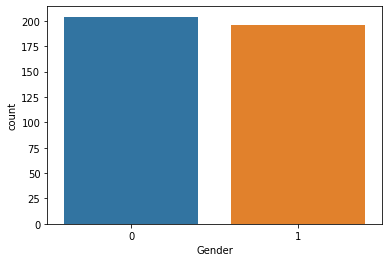

In [14]:
sb.countplot(x = "Gender", data = df);

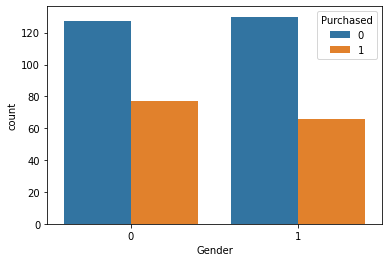

In [15]:
sb.countplot(x = "Gender", hue = "Purchased", data = df);

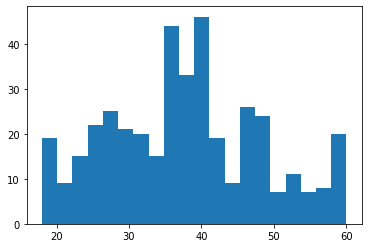

In [16]:
plt.hist(x = df["Age"], bins = 20);

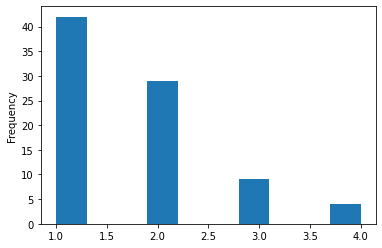

In [17]:
p = df[df["Purchased"] == 1].groupby(["EstimatedSalary"]).count()
p["Purchased"].plot(kind = "hist")

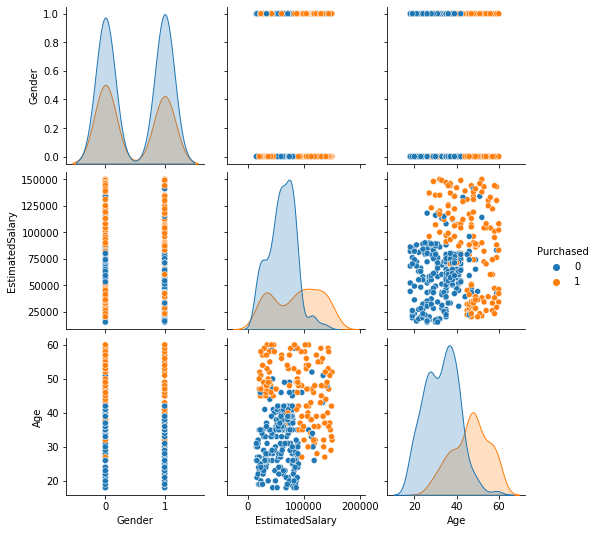

In [20]:
sb.pairplot(data = df, hue = "Purchased", vars = ["Gender", "EstimatedSalary", "Age"]);

In [21]:
features = df[["Age", "Gender", "EstimatedSalary"]]
target = df["Purchased"]

In [22]:
features, target

(     Age  Gender  EstimatedSalary
 0     19       1            19000
 1     35       1            20000
 2     26       0            43000
 3     27       0            57000
 4     19       1            76000
 ..   ...     ...              ...
 395   46       0            41000
 396   51       1            23000
 397   50       0            20000
 398   36       1            33000
 399   49       0            36000
 
 [400 rows x 3 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [35]:
# As mentioned using the KNN approach :

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [36]:
y_pred = model.predict(x_test)
print("Prediction : ", y_pred)

Prediction :  [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0]


In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {} %".format(accuracy*100))

Accuracy : 76.25 %


In [33]:
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", matrix)

Confusion Matrix :
 [[73  5]
 [22 20]]


# EXIT